## Gradient Descend for a function of one variable

Consider the function of one variable $f : \mathbb{R}\rightarrow\mathbb{R}$ and a few observations:

+ The local minimum point $x^*$ of a function is the point with derivative $f'(x^*) = 0$. Furthermore, in its neighborhood, the derivatives of points to the left of $x^*$ are non-positive, the derivatives of points to the right of $x^*$ are non-negative.
+ The line tangent to the graph of that function at any point has a slope equal to the derivative of the function at that point.

Suppose $x_t$ is the point found after the $t^{th}$ iteration. We need to find an algorithm to bring $x_t$ as close to $x^*$ as possible. There are two observations as follows:

1. If the derivative of the function at $x_t$ is positive $(f'(x_t) > 0)$ then $x_t$ is to the right compared to $x^*$, and vice versa. To make the next point $x_{t+1}$ closer to $x^*$, we need to move $x_t$ to the left, that is, to the negative side. In other words, we need to move **opposite to the derivative**:

$$x_{t+1} = x_t + \Delta$$

In which, $\Delta$ is a quantity with opposite sign to $f'(x_t)$.

2. The farther $x_t$ is from $x^*$ to the right, the larger $f'(x_t)$ is than $0$ (and vice versa). So, the amount of movement $\Delta$ is, most naturally, proportional to $-f'(x_t)$.

The two comments above give us a simple update

$$x_{t+1} = x_t - \eta f'(x_t)$$

In which, $\eta$ is a positive number called learning rate. The minus sign shows that we have to go against the derivative.

### Example in Python:

Considering the function

$$f(x) = x^2 + 5\sin(x)$$

We have the derivative of this function as

$$f'(x) = 2x + 5\cos(x)$$

Suppose starting from a certain point $x_0$, at the $t^{th}$ loop, we will update as follows:

$$x_{t+1} = x_t - \eta[2x_t + 5\cos(x_t)]$$

In [2]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# to calculate the derivative
def grad1(x):
    return 2 * x + 5 * np.cos(x)

def cost1(x):
    """ 
    To calculate the value of a function. 
    This function is not used in the algorithm but is often used to check whether the calculation of the derivative is correct 
    or to see if the value of the function decreases with each loop.
    """
    return x**2 + 5 * np.sin(x)

# to calculate the gradient descent
def myGD1(grad, x0, eta):
    x = [x0]
    for it in range(100):
        x_new = x[-1] - eta * grad(x[-1])
        if (abs(grad(x_new)) < 1e-3):
            break
        x.append(x_new)
    return (x, it)

In [3]:
(x1, it1) = myGD1(grad1, -5, .1)
(x2, it2) = myGD1(grad1, 5, .1)
print(f'Solution x1 =  {x1[-1]}, cost = {cost1(x1[-1])}, after {it1} iterations.')
print(f'Solution x2 =  {x2[-1]}, cost = {cost1(x2[-1])}, after {it2} iterations.')

Solution x1 =  -1.1106667365268623, cost = -3.2463941936103735, after 11 iterations.
Solution x2 =  -1.1103410483948122, cost = -3.246394179661889, after 29 iterations.


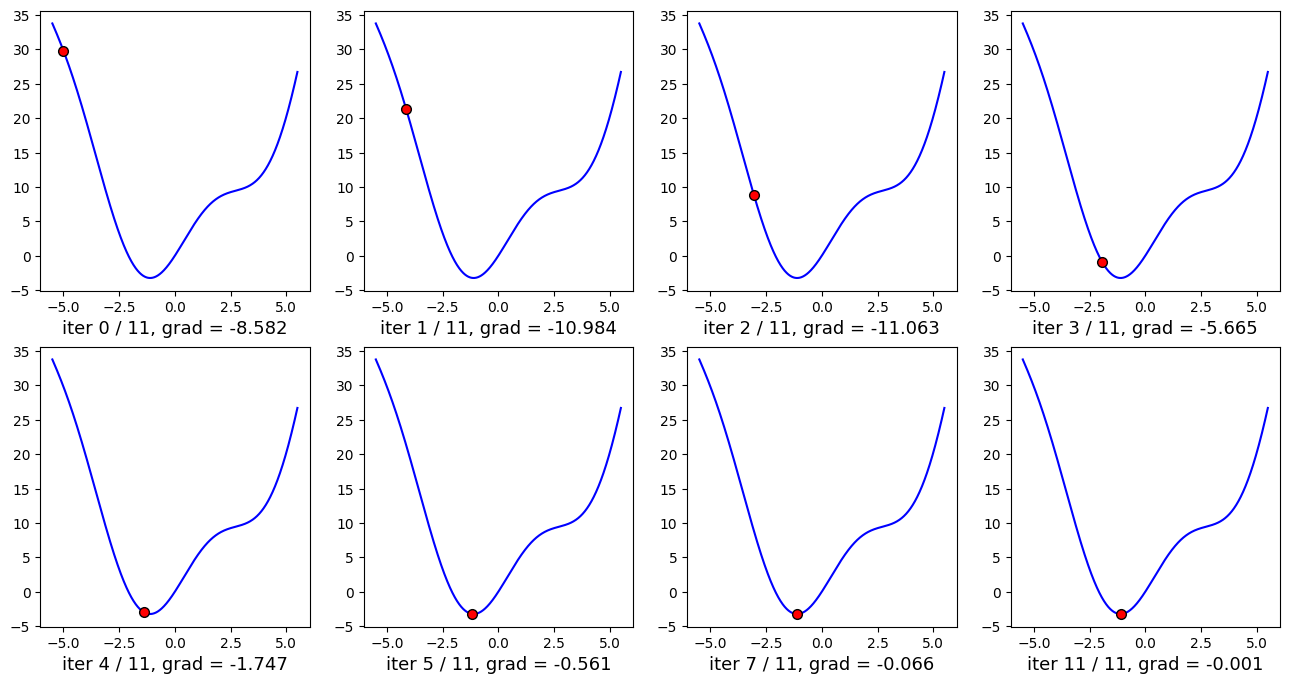

In [4]:
def draw_GD_1D(x1, ids, grad, cost, nrows=2, ncols=4, starts=-5.5, end=5.5):
    x0 = np.linspace(starts, end, 1000)
    y0 = cost(x0)

    fig, axs = plt.subplots(nrows, ncols, figsize=(4 * ncols, 4 * nrows))

    for i, k in enumerate(ids):
        r = i // ncols
        c = i % ncols

        x = x1[k]
        y = cost(x)
        str0 = 'iter {} / {}, grad = {:.3f}'.format(ids[i], len(x1) - 1, grad(x))

        if nrows > 1:
            axs[r, c].plot(x0, y0, 'b')
            axs[r, c].set_xlabel(str0, fontsize=13)
            axs[r, c].plot(x, y, 'ro', markersize=7, markeredgecolor='k')
            axs[r, c].plot()
        else: 
            axs[c].plot(x0, y0, 'b')
            axs[c].set_xlabel(str0, fontsize=13)
            axs[c].plot(x, y, 'ro', markersize=7, markeredgecolor='k')
            axs[c].plot()
    
    plt.show()

(x1, it0) = myGD1(grad1, -5, .1)
# print(len(x1))
ids = [0, 1, 2, 3, 4, 5, 7, 11]
draw_GD_1D(x1, ids, grad=grad1, cost=cost1)

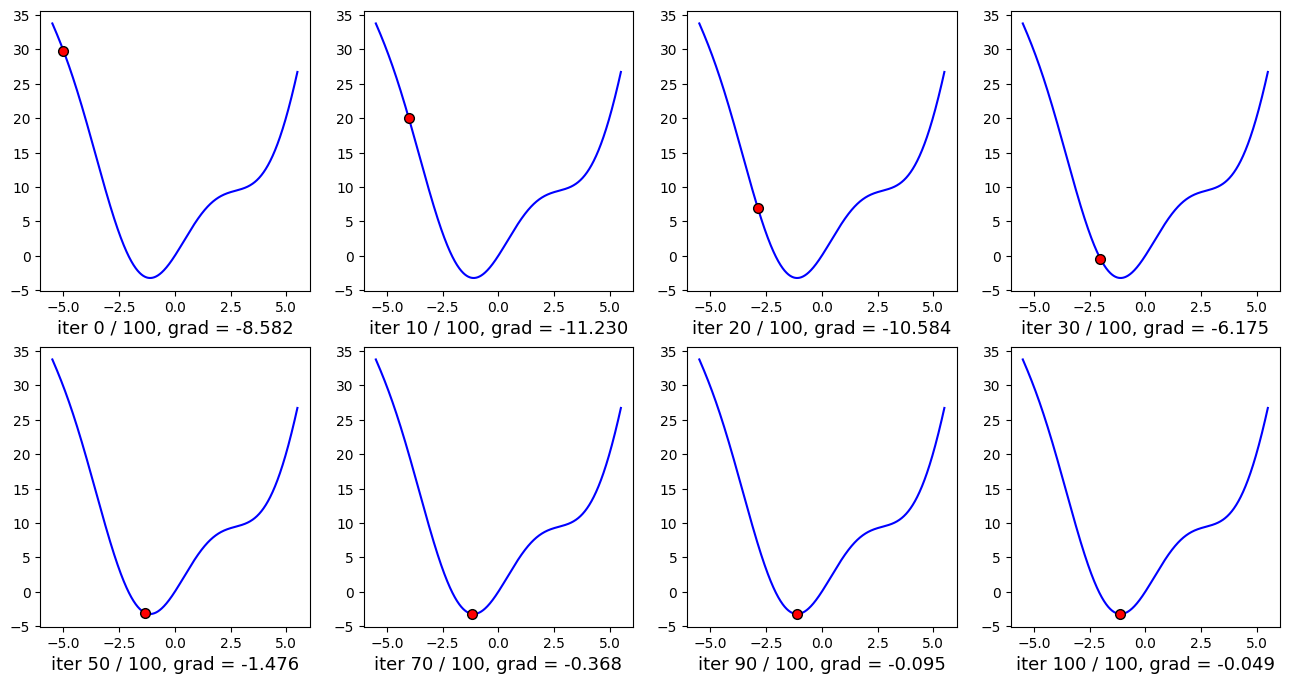

In [5]:
# small learning rate
(x1, it0) = myGD1(grad1, -5, .01)
ids = [0, 10, 20, 30, 50, 70,  90, 100]
draw_GD_1D(x1, ids, grad=grad1, cost=cost1)

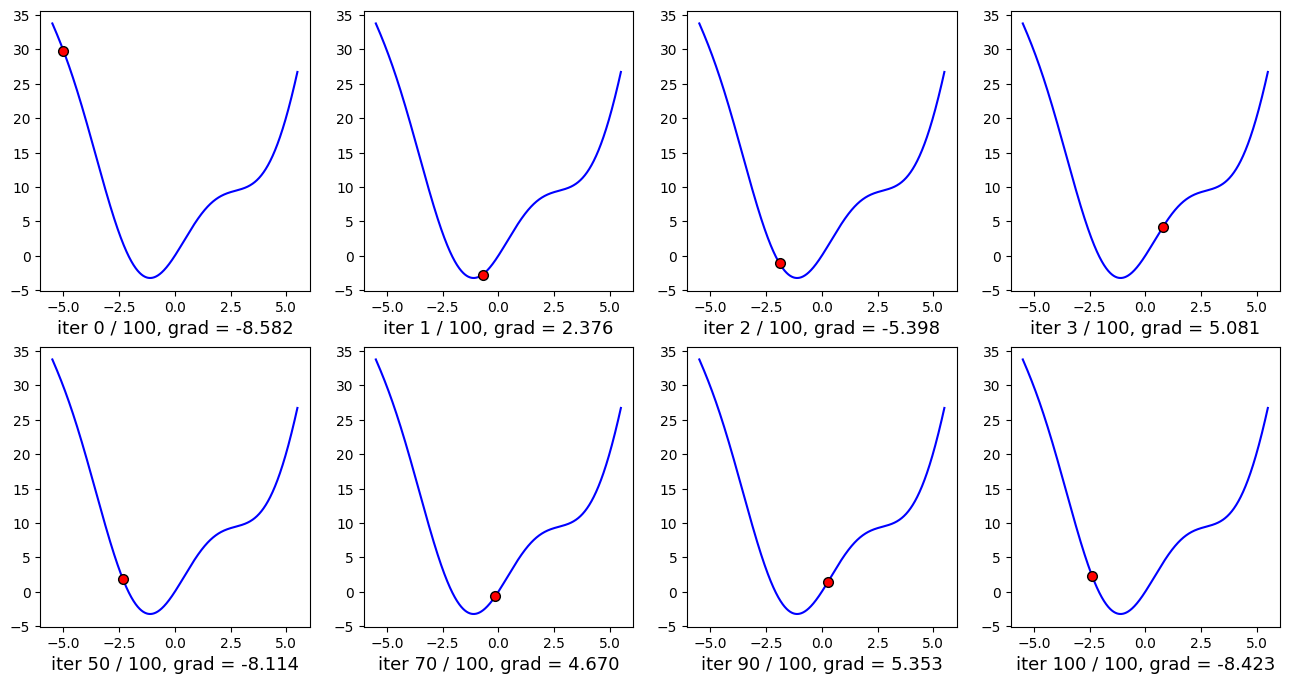

In [6]:
# large learning rate 
(x1, it0) = myGD1(grad1, -5, .5)
ids = [0, 1, 2, 3, 50, 70,  90, 100]
draw_GD_1D(x1, ids, grad=grad1, cost=cost1)

## Gradient descend for multivariable functions

Suppose we need to find the global minimum for the function $f(\theta)$ where $\theta$ is the set of parameters to be optimized. The derivative of that function at any point $\theta$ is denoted $\nabla_{\theta}f(\theta_t)$. The GD algorithm for a multivariable function also starts with a prediction point $\theta_0$ , then, in the $t^{th}$ loop, the update rule is

$$\theta_{t+1} = \theta_t - \eta\nabla_{\theta}f(\theta_t)$$

another way to write:

$$\theta_{t+1} \leftarrow \theta_t - \eta\nabla_{\theta}f(\theta_t)$$

### GD for linear regression:

We have a cost function as

$$\mathcal{L}(\textbf{w}) = \frac{1}{2N}||\textbf{y} - \textbf{X}^T\textbf{w}||_2^2$$

And we have the following derivative

$$\nabla_{\textbf{w}}\mathcal{L}(\textbf{w}) = \frac{1}{N}\textbf{X}(\textbf{X}^T\textbf{w} - \textbf{y})$$

For example:

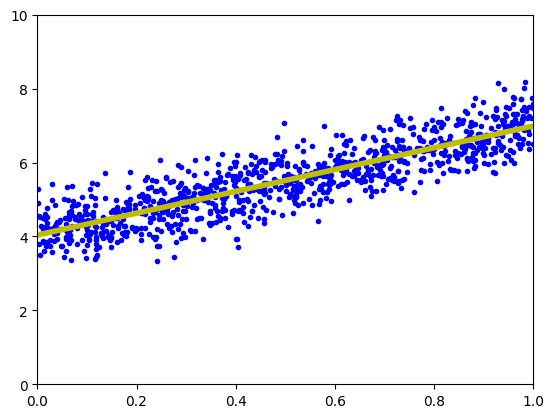

In [5]:
from sklearn.linear_model import LinearRegression

np.random.seed(0)

X = np.random.rand(1000)
y = 4 + 3 * X + .5 * np.random.randn(1000) # noise added

model = LinearRegression()
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))

w, b = model.coef_[0][0], model.intercept_[0]

x0 = np.linspace(0, 1, 1000, endpoint=True)
y0 = w * x0 + b

plt.plot(X, y, 'b.')
plt.plot(x0, y0, 'y', linewidth=4)
plt.axis([0, 1, 0, 10])
plt.show()

In [6]:
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X.reshape(-1, 1)), axis = 1)

def grad2(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def cost2(w):
    N = Xbar.shape[0]
    return .5/N * np.linalg.norm(y - Xbar.dot(w))**2

def myGD(grad, w_init, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta * grad(w[-1])
        if np.linalg.norm(grad(w_new)) / len(w_new) < 1e-3:
            break 
        w.append(w_new)
    return (w, it)

w_init = np.array([2, 1])
(w1, it1) = myGD(grad2, w_init, 1)
print(f'Solution found by scikit-learn: [b, w] = {[b, w]}')
print(f'Solution found by GD: [b, w] = {w1[-1]}, after {it1 + 1} iterations.')
print(np.array(w1))

Solution found by scikit-learn: [b, w] = [4.038583624662032, 2.951481168762003]
Solution found by GD: [b, w] = [4.0535153  2.92338451], after 47 iterations.
[[2.         1.        ]
 [5.00636516 2.65571929]
 [4.18525831 2.27349113]
 [4.37481349 2.42475031]
 [4.2998008  2.43203111]
 [4.29619009 2.47410684]
 [4.27532383 2.50407197]
 [4.26046348 2.53448507]
 [4.24538097 2.56221969]
 [4.23162678 2.58827092]
 [4.21870741 2.61253619]
 [4.20667374 2.63519155]
 [4.19543846 2.65632966]
 [4.18495561 2.67605586]
 [4.17517297 2.69446346]
 [4.16604424 2.71164088]
 [4.15752559 2.72767025]
 [4.14957628 2.74262833]
 [4.14215824 2.75658671]
 [4.13523598 2.7696122 ]
 [4.12877636 2.78176715]
 [4.12274846 2.79310974]
 [4.11712343 2.80369426]
 [4.11187433 2.81357139]
 [4.10697606 2.82278839]
 [4.10240515 2.83138938]
 [4.09813973 2.83941554]
 [4.09415938 2.84690529]
 [4.09044506 2.85389446]
 [4.08697897 2.86041653]
 [4.08374454 2.8665027 ]
 [4.08072628 2.87218212]
 [4.07790973 2.87748195]
 [4.07528143 2.882

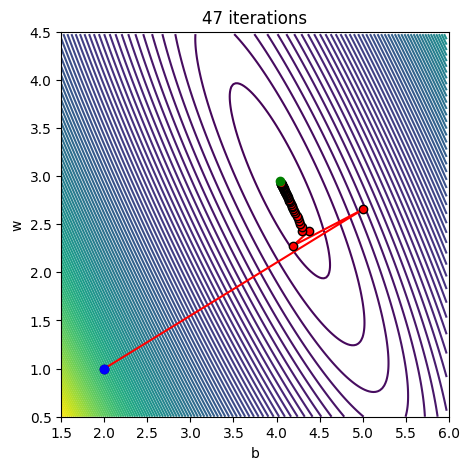

In [7]:
import matplotlib
import matplotlib.pyplot as plt

N = X.shape[0]

a1 = 0.5 * np.linalg.norm(y, 2)**2 / N
b1 = np.sum(X) / N
c1 = 0.5 * np.linalg.norm(X, 2)**2 / N
d1 = -np.sum(y) / N 
e1 = -X.T.dot(y) / N

delta = 0.025
bg = np.arange(1.5, 6.0, delta)
wg = np.arange(0.5, 4.5, delta)
Bg, Wg = np.meshgrid(bg, wg)
J_w = a1 + 0.5 * Bg**2 + b1 * Bg * Wg + c1 * Wg**2 + d1 * Bg + e1 * Wg

def lr_gd_draw(w1):
    w_hist = np.array(w1)
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.axis([1.5, 6, 0.5, 4.5])
    CS = plt.contour(Bg, Wg, J_w, 100)
    plt.plot(w_hist[:, 0], w_hist[:, 1], marker='o',color='r', linestyle='-', markeredgecolor='k')
    plt.plot(w_hist[0, 0], w_hist[0, 1], 'bo') # start point
    plt.plot(b, w, 'go') # end point
    plt.xlabel('b')
    plt.ylabel('w')
    plt.title(f'{w_hist.shape[0]} iterations')
    plt.show()

lr_gd_draw(w1)

Explain a little about the code above. Actually, this $Z$ equation is derived from the cost function of linear regression, specifically as follows:

$$\mathcal{L}(\textbf{w}) = \frac{1}{2N}||\textbf{y} - \textbf{X}^T\textbf{w}||_2^2 = \frac{1}{2N}\sum_{i=1}^{N}(y_i - (\textbf{x}_i^T\textbf{w} + b))^2$$

Considering $(y_i - (\textbf{x}_i^T\textbf{w} + b))^2$ we get the following:

$$(y_i - (\textbf{x}_i^T\textbf{w} + b))^2 = y_i^2 - 2y_i\textbf{x}_i^T\textbf{w} - 2y_ib + (\textbf{x}_i^T)^2\textbf{w}^2 + 2\textbf{x}_i^T\textbf{w}b + b^2$$

And next:

$$\sum_{i=1}^{N}(y_i - (\textbf{x}_i^T\textbf{w} + b))^2 = \sum_{i=1}^{N}y_i^2 - 2\textbf{w}\sum_{i=1}^{N}y_i\textbf{x}_i^T - 2b\sum_{i=1}^{N}y_i + \textbf{w}^2\sum_{i=1}^{N}(\textbf{x}_i^T)^2 + 2\textbf{w}b\sum_{i=1}^{N}\textbf{x}_i^T + b^2\sum_{i=1}^{N}1$$

And equals:

$$\sum_{i=1}^{N}(y_i - (\textbf{x}_i^T\textbf{w} + b))^2 = ||\textbf{y}||_2^2 - 2\textbf{w}\textbf{X}\textbf{y} - 2b\sum_{i=1}^{N}y_i + \textbf{w}^2||\textbf{X}||_2^2 + 2\textbf{w}b\sum_{i=1}^{N}\textbf{x}_i^T + Nb^2$$

Multiply $\frac{1}{2N}$ by both sides, we get

$$\frac{1}{2N}\sum_{i=1}^{N}(y_i - (\textbf{x}_i^T\textbf{w} + b))^2 = \frac{1}{2N}||\textbf{y}||_2^2 - \frac{1}{N}\textbf{w}\textbf{X}\textbf{y} - \frac{1}{N}b\sum_{i=1}^{N}y_i + \frac{1}{2N}\textbf{w}^2||\textbf{X}||_2^2 + \frac{1}{N}\textbf{w}b\sum_{i=1}^{N}\textbf{x}_i^T + \frac{1}{2}b^2$$

This equation corresponds to the coefficients declared above.

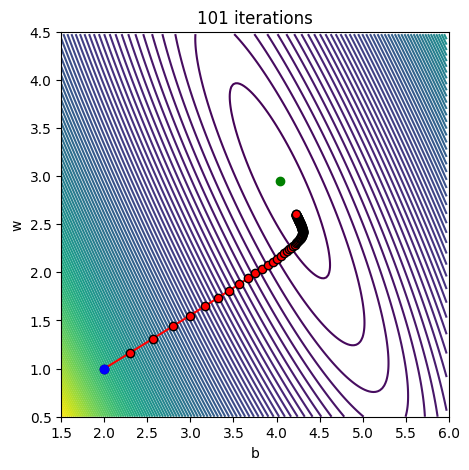

In [35]:
# with smaller learning rate
(w2, it2) = myGD(grad2, w_init, .1)
lr_gd_draw(w2)

### Extended example:

In [6]:
import numpy.random as rnd # 

np.random.seed(2)

X = 2 * rnd.rand(100, 1)
y = 4 + 3 * X + rnd.randn(100, 1)

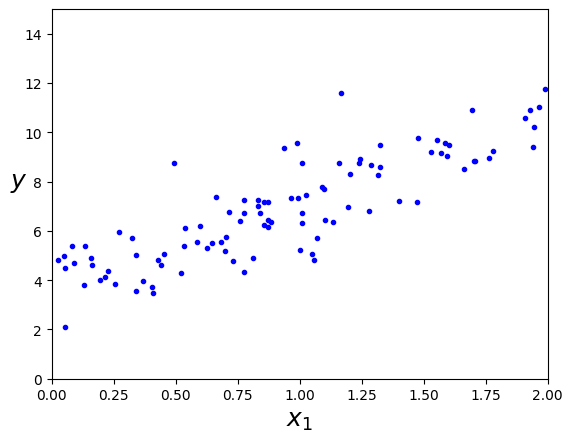

In [9]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
import numpy.linalg as LA

X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = LA.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [14]:
theta_best

array([[3.74106117],
       [3.397613  ]])

In [29]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.74106117],
       [10.53628717]])

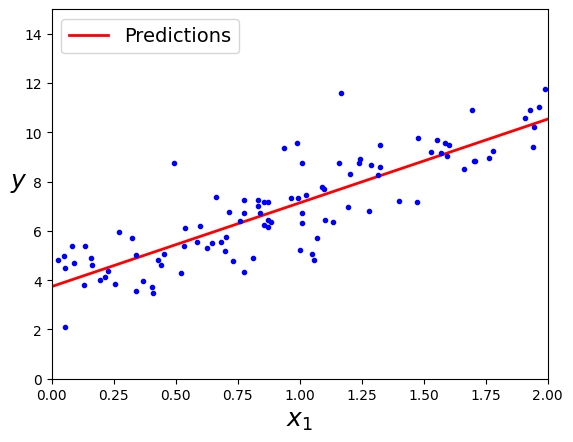

In [30]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

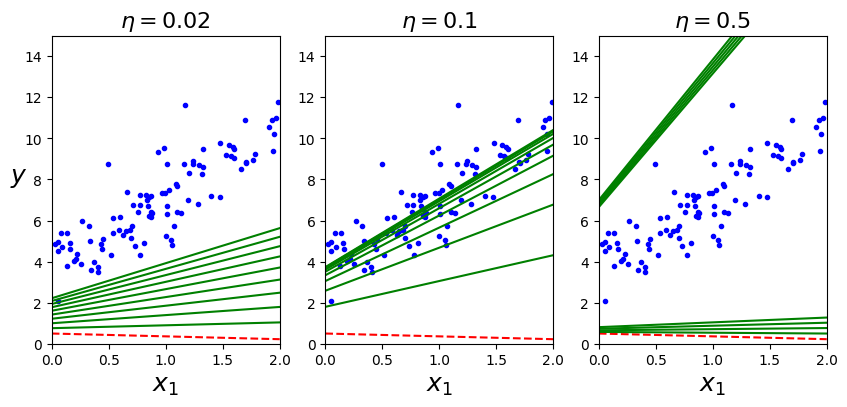

In [31]:
def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "g-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

rnd.seed(42)
theta = rnd.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

### Visualize using `.gif`:

MovieWriter imagemagick unavailable; using Pillow instead.


MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.


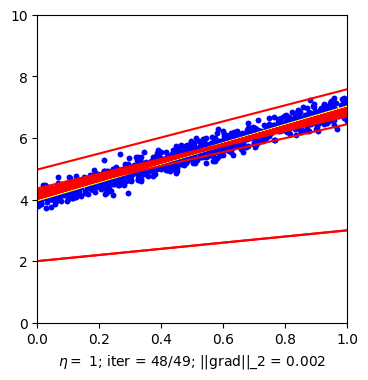

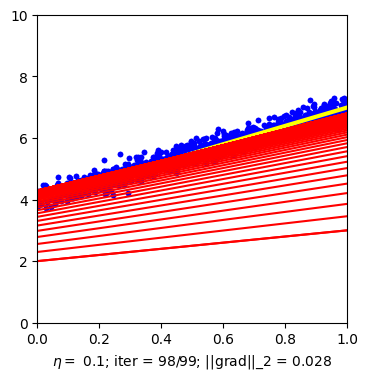

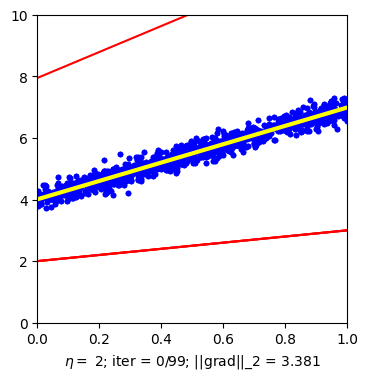

In [18]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 

np.random.seed(2)

X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2 * np.random.randn(1000, 1)

w_init = np.array([[2], [1]])

# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_exact = np.dot(np.linalg.pinv(A), b)

def save_gif1(eta, grad):
    (w, it) = myGD(grad, w_init, eta)
    fig, ax = plt.subplots(figsize=(4, 4))
    x0 = np.linspace(0, 1, 2, endpoint=True)
    
    def update(ii):
        if ii == 0:
            plt.plot(X, y, 'b.')
            plt.axis([0, 1, 0, 10])
            y0 = w_exact[0][0] + w_exact[1][0] * x0
            plt.plot(x0, y0, color = 'yellow', linewidth = 3)

        y0 = w[ii][0] + w[ii][1] * x0
        animlist = plt.plot(x0, y0, 'r', linewidth = 1.5) 
        
        xlabel = '$\eta =$ ' + str(eta) + '; iter = %d/%d' %(ii, it) + '; ||grad||_2 = %.3f' % np.linalg.norm(grad(w[ii]))
        ax.set_xlabel(xlabel)
        return animlist, ax
    
    anim1 = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    """
    In this case, `frames=np.arange(0, it)`. This means that `FuncAnimation` will call the `update` function for each value in 
    the range from `0` to `it - 1`. That value is passed to the update function as parameter `ii`.
    """
    fn = 'img1_' + str(eta) + '.gif'
    anim1.save(fn, dpi=100, writer='imagemagick')
    
save_gif1(1, grad2)
save_gif1(.1, grad2)
save_gif1(2, grad2)

Let's briefly talk about the `FuncAnimation` function: The `FuncAnimation` function in the `matplotlib.animation` library is used to create an animation by continuously updating an image or an object in an image.

In the above code, `FuncAnimation` is used to create an animation for updating the line in the 2D chart.

Specifically, `FuncAnimation` receives a number of parameters as follows:

+ `fig`: This is the Figure object that the animation will be drawn on.
+ `update`: This is the function that will be called at each frame of the animation. This function takes as parameter the current frame number and returns a list of "Artists" that need to be drawn on the image.
+ `frames`: This is the number of frames in the animation.
+ `interval`: This is the time interval (measured in milliseconds) between frames.

Finally, the `FuncAnimation` object's `save` method is called to save the animation as a `.gif` file. The `save` function is a method of the FuncAnimation object in the `matplotlib.animation` library. This method is used to save the animation as a file.

Specifically, save receives the following parameters:

+ `fn`: Name of the file the animation will be saved to. In this case, the filename is generated based on the eta learning rate and has the format 'img1_' + eta + '.gif'.
+ `dpi`: Resolution of the image file. In this case, the resolution is set to 100.
+ `writer`: Format of image file. In this case, the format is set to 'imagemagick', a popular image converter.

The result is a `.gif` file representing the learning process of the Gradient Descent algorithm with the learning rate eta saved to disk.

MovieWriter imagemagick unavailable; using Pillow instead.


MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.


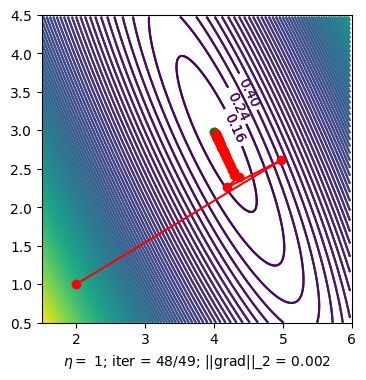

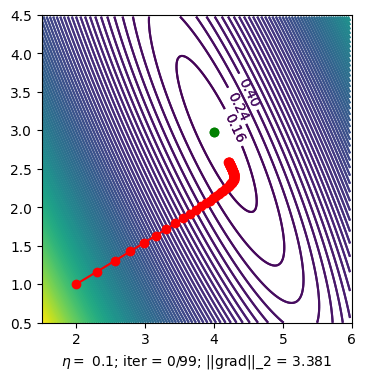

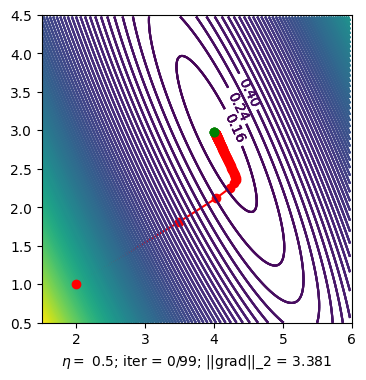

In [19]:
def save_gif2(eta, grad):
    (w, it) = myGD(grad, w_init, eta)
    fig, ax = plt.subplots(figsize=(4,4))
    plt.axis([1.5, 6, 0.5, 4.5])
    
    def update(ii):
        if ii == 0:
            CS = plt.contour(Bg, Wg, J_w, 100) # 100 contour lines
            manual_locations = [(4.5, 3.5), (4.2, 3), (4.3, 3.3)]
            animlist = plt.clabel(CS, inline=.1, fontsize=10, manual=manual_locations)
            """
            This line uses the `clabel` function in the `plt` library to mark points on the contour plot.

            - The first argument of the clabel function is CS, which is the contour plot created in the previous line. 
            - The `inline=.1` argument specifies that the labels of the points will be displayed immediately above the contour. 
            - The `fontsize=10` argument specifies the font size for the label. 
            - The manual argument is a list of coordinates `(x, y)` that you want to plot on the contour plot. In this code, 
            the `manual_locations` list contains the coordinates `(4.5, 3.5)`, `(4.2, 3)`, and `(4.3, 3.3)`. 

            The result of the `clabel` function is assigned to the `animlist` variable.
            """
            plt.plot(w_exact[0], w_exact[1], 'go')
        else:
            animlist = plt.plot([w[ii-1][0], w[ii][0]], [w[ii-1][1], w[ii][1]], 'r-')
        animlist = plt.plot(w[ii][0], w[ii][1], 'ro') 
        xlabel = '$\eta =$ ' + str(eta) + '; iter = %d/%d' %(ii, it) + '; ||grad||_2 = %.3f' % np.linalg.norm(grad(w[ii]))
        ax.set_xlabel(xlabel)
        return animlist, ax
       
    anim1 = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    fn = 'img2_' + str(eta) + '.gif'
    anim1.save(fn, dpi=100, writer='imagemagick')

save_gif2(1, grad2)
save_gif2(.1, grad2)
save_gif2(.5, grad2)

MovieWriter imagemagick unavailable; using Pillow instead.


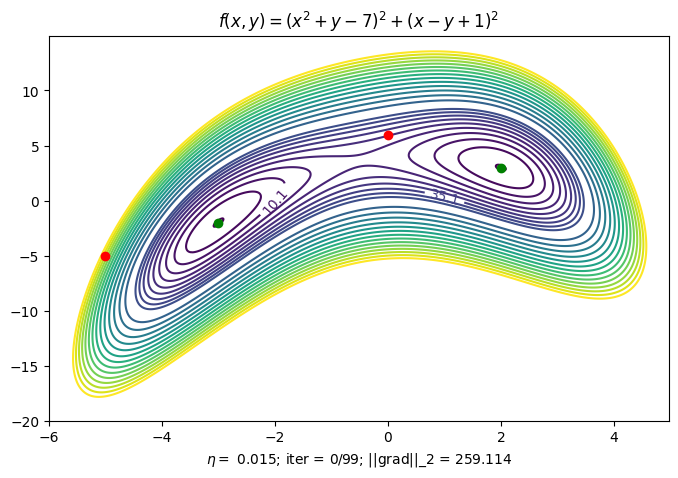

In [20]:
delta = 0.025
x = np.arange(-6.0, 5.0, delta)
y = np.arange(-20.0, 15.0, delta)
X, Y = np.meshgrid(x, y)
Z = (X**2 + Y - 7)**2 + (X-Y + 1)**2

def grad4(w):
	x = w[0] # b
	y = w[1] # w
	g = np.zeros_like(w)
	g[0] = 2*(x**2 + y - 7)*2*x + 2*(x - y + 1)
	g[1] = 2*(x**2 + y - 7)     + 2*(y - x - 1)
	return g

def save_gif2_1(eta, grad, myGD):
    w_init = np.array([[-5], [-5]])
    (w, it) = myGD(grad, w_init, eta)
    w_init = np.array([[0], [6]])
    (w2, it) = myGD(grad, w_init, eta)
    fig, ax = plt.subplots(figsize=(8,5))
    plt.axis([1.5, 6, 0.5, 4.5])
    title = '$f(x, y) = (x^2 + y -7)^2 + (x - y + 1)^2$'
    def update(ii):
        if ii == 0:
            plt.cla()
            CS = plt.contour(X, Y, Z, np.concatenate((np.arange(0.1, 50, 5), np.arange(60, 200, 10))))
            manual_locations = [(-2, 0), ( 1, .25)]
            animlist = plt.clabel(CS, inline=.1, fontsize=10, manual=manual_locations)
            animlist = plt.title('$f(x, y) = (x^2 + y -7)^2 + (x - y + 1)^2$')
            plt.plot([-3, 2], [-2, 3], 'go')
        else:
            animlist = plt.plot([w[ii-1][0], w[ii][0]], [w[ii-1][1], w[ii][1]], 'r-')
            animlist = plt.plot([w2[ii-1][0], w2[ii][0]], [w2[ii-1][1], w2[ii][1]], 'r-')
        animlist = plt.plot(w[ii][0], w[ii][1], 'ro') 
        animlist = plt.plot(w2[ii][0], w2[ii][1], 'ro') 
        # plt.axis('off')
        xlabel = '$\eta =$ ' + str(eta) + '; iter = %d/%d' %(ii, it) + '; ||grad||_2 = %.3f' % np.linalg.norm(grad(w[ii]))
        ax.set_xlabel(xlabel)
        return animlist, ax
       
    anim1 = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    fn = 'img3_' + str(eta) + '.gif'
    anim1.save(fn, dpi=100, writer='imagemagick')

save_gif2_1(.015, grad4, myGD)

## Gradient descent with momentum

Suppose we have local minimums as below, if the initial point velocity at the starting point is not large enough, it will be difficult for the point to move out of this local minimum position to reach the global minimum. On the contrary, if this velocity is large enough, then according to *momentum*, the ball can move to the global minimum point. This algorithm is called *momentum*.

![GDMomentumURL](https://gbhat.com/assets/gifs/sgd_with_momentum2.gif "GDMomentum")

In GD, we need to calculate the amount of change at time $t$ to update the new position of the solution. If we think of this quantity as the velocity $v_t$ in physics, the new position of the marble will be $\theta_{t+1} = \theta_t − v_t$, assuming that each loop is a unit. taste of time. The minus sign represents having to move against the derivative. The next thing is to calculate the quantity $v_t$ so that it both carries information about the slope (ie the derivative) and also carries information about the momentum, which is the previous velocity $v_{t-1}$ (with the assumption that the initial velocity $v_0 = 0$). In the simplest way, we can take their weighted sum:

$$v_t = \gamma v_{t-1} + \eta\nabla_{\theta}J(\theta)$$

Where $\gamma$ is usually chosen to be a smaller value close to one, usually around $0.9$, $v_{t-1}$ is the velocity at the previous time, $\nabla_{\theta}J (\theta)$ is the slope of the previous point. Then, the new position of the solution is determined by

$$\theta\leftarrow\theta - v_t = \theta - \eta\nabla_{\theta}J(\theta) - \gamma v_{t-1}$$

We will try to practice a small example of this algorithm. Consider a simple function with two local minima, one of which is the global minimum

$$f(x) = x^2 + 10sin(x)$$

In [13]:
def grad3(x):
    return 2 * x + 10 * np.cos(x)

def cost3(x):
    return x**2 + 10 * np.sin(x)

def GD_momentum(grad, theta_init, eta, gamma):
    # Suppose we want to store history of theta
    theta = [theta_init]
    v_old = np.zeros_like(theta_init)
    for it in range(100):
        v_new = gamma * v_old + eta * grad(theta[-1])
        theta_new = theta[-1] - v_new
        if np.linalg.norm(grad(theta_new)) / np.array(theta_init).size < 1e-3:
            break
        theta.append(theta_new)
        v_old = v_new
    return theta 

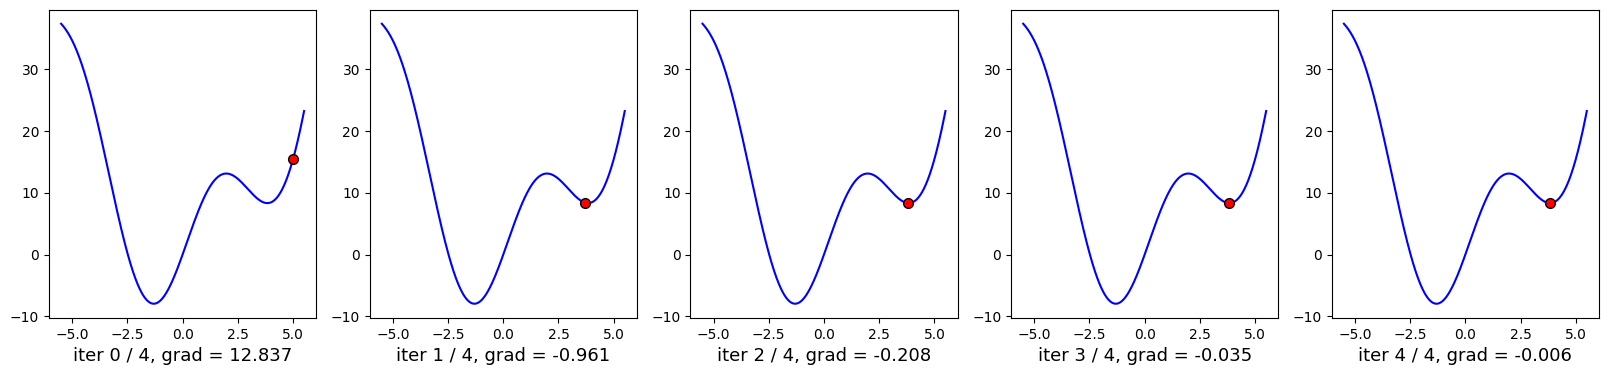

In [37]:
(thetas, it4) = myGD1(grad3, 5, .1)
ids = [0, 1, 2, 3, 4]
draw_GD_1D(thetas, ids, grad=grad3, cost=cost3, nrows=1, ncols=5)

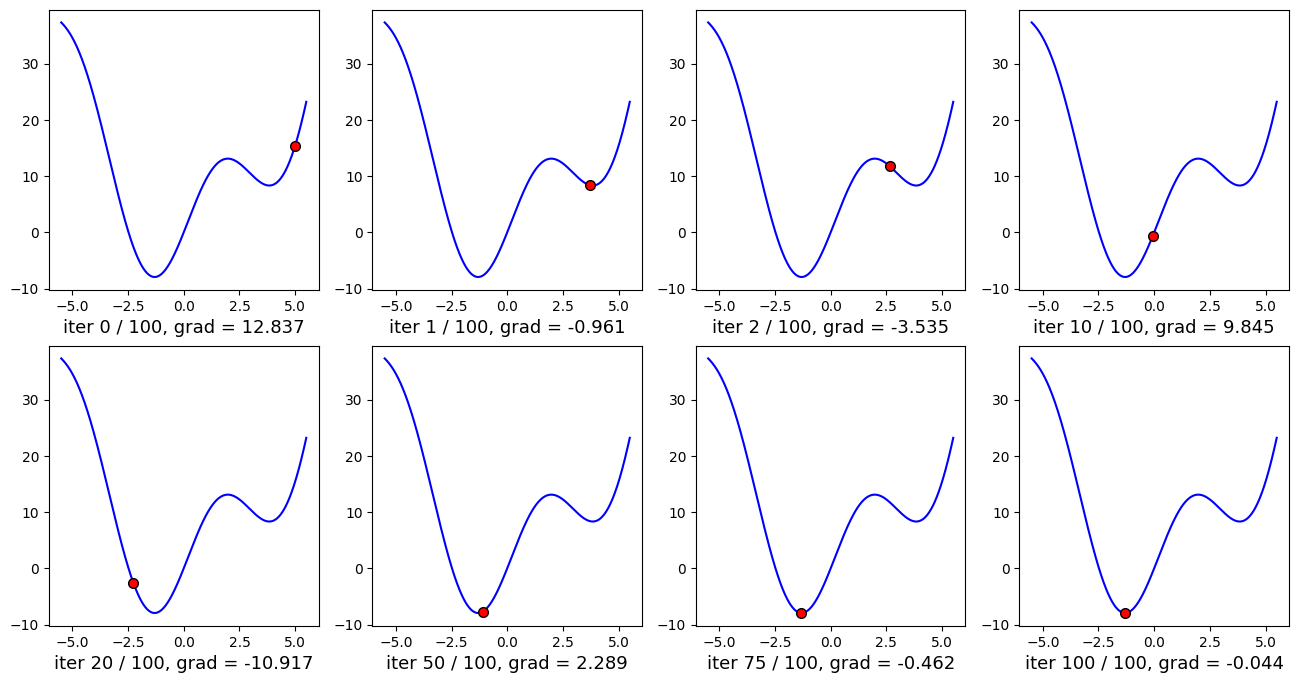

In [23]:
# good learning rate
thetas = GD_momentum(grad3, 5, .1, .9)
ids = [0, 1, 2, 10, 20, 50, 75, 100]
draw_GD_1D(thetas, ids, grad=grad3, cost=cost3)

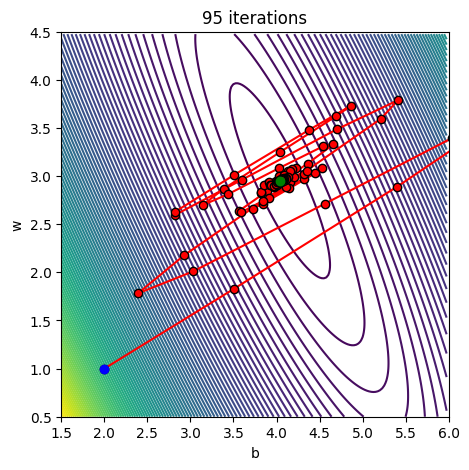

In [38]:
w3 = GD_momentum(grad2, w_init, .5, .9)
lr_gd_draw(w3)

### Visualize using `.gif`:

In [11]:
def cost4(x):
    return x**2 + 10*np.sin(x)

def grad4(x):
    return 2*x + 10*np.cos(x)

MovieWriter imagemagick unavailable; using Pillow instead.


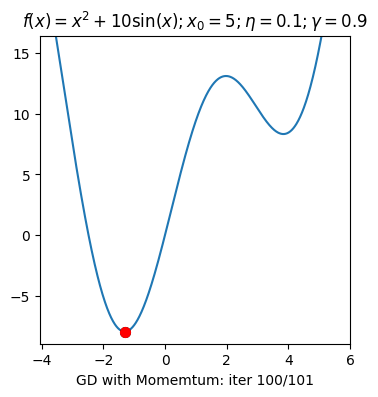

In [23]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

def viz_alg_1d(x, cost, title, myLabel, filename = 'momentum1d2.gif'):
#     x = x.asarray()
    it = len(x)
    y = cost(x)
    xmin, xmax = np.min(x), np.max(x)
    ymin, ymax = np.min(y), np.max(y)
    
    x0 = np.linspace(xmin-1, xmax+1, 1000)
    y0 = cost(x0)
       
    fig, ax = plt.subplots(figsize=(4, 4))  
    
    def update(i):
        ani = plt.cla()
        plt.axis([xmin-1, xmax+1, ymin-1, ymax+1])
        plt.plot(x0, y0)
        ani = plt.title(title)
        if i == 0:
            ani = plt.plot(x[i], y[i], 'ro', markersize = 7)
        else:
            ani = plt.plot(x[i-1], y[i-1], 'ok', markersize = 7)
            ani = plt.plot(x[i-1:i+1], y[i-1:i+1], 'k-')
            ani = plt.plot(x[i], y[i], 'ro', markersize = 7)
        label = myLabel + ': iter %d/%d' %(i, it)
        ax.set_xlabel(label)
        return ani, ax 
        
    anim = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    anim.save(filename, dpi = 100, writer = 'imagemagick')
    plt.show()

x = GD_momentum(grad4, 5, .1, .9)
viz_alg_1d(np.array(x), cost4, '$f(x) = x^2 + 10\sin(x); x_0 = 5; \eta = 0.1; \gamma = 0.9$', 'GD with Momemtum')

MovieWriter imagemagick unavailable; using Pillow instead.


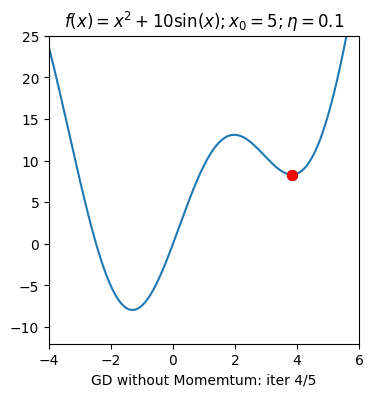

In [25]:
## GD example
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 
def viz_alg_1d_2(x, cost, filename = 'nomomentum1d.gif'):
#     x = x.asarray()
    it = len(x)
    y = cost(x)
    xmin, xmax = np.min(x), np.max(x)
    ymin, ymax = np.min(y), np.max(y)
    xmin, xmax = -4, 6
    ymin, ymax = -12, 25
    x0 = np.linspace(xmin-1, xmax+1, 1000)
    y0 = cost(x0)
       
    fig, ax = plt.subplots(figsize=(4, 4))  
    
    def update(i):
        ani = plt.cla()
        plt.axis([-4 , 6, -13, 26])
        plt.plot(x0, y0)
        plt.axis([xmin, xmax, ymin, ymax])
        ani = plt.title('$f(x) = x^2 + 10\sin(x); x_0 = 5; \eta = 0.1$')
        if i == 0:
            ani = plt.plot(x[i], y[i], 'ro', markersize = 7)
        else:
            ani = plt.plot(x[i-1], y[i-1], 'ok', markersize = 7)
            ani = plt.plot(x[i-1:i+1], y[i-1:i+1], 'k-')
            ani = plt.plot(x[i], y[i], 'ro', markersize = 7)
        label = 'GD without Momemtum: iter %d/%d' %(i, it)
        ax.set_xlabel(label)
        return ani, ax 
        
    anim = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    anim.save(filename, dpi = 100, writer = 'imagemagick')
    plt.show()

(x, it5) = myGD1(grad4, 5, .1)
viz_alg_1d_2(np.array(x), cost4)

## Nesterov accelerated gradient

Momentum helps the solution overcome the local minimum slope. However, there is a limitation we can see in the example above: when approaching the destination, momemtum still takes quite a while before stopping, also because of *momentum*. A technique called Nesterov accelerated gradient (NAG) helps the momentum GD algorithm converge faster.

The main idea of the NAG algorithm is to predict the location of the solution one step ahead. Specifically, if we use the momentum term $\gamma v_{t-1}$ to update, we can approximate the next position of the solution as $\theta − \gamma v_{t-1}$ . So, instead of using the gradient of the current point, NAG goes one step ahead, using the gradient of the point predicted to be the next location.

+ With normal momentum, the amount of change is the sum of two vectors: momentum vector and gradient at the present time.
+ With NAG, the amount of change is the sum of two vectors: the momentum vector and the gradient of the point predicted to be the next position.

The updated formula is:

$$v_t = \gamma v_{t-1} + \eta\nabla_{\theta}J(\theta - \gamma v_{t-1})$$
$$\theta\leftarrow\theta - v_t$$

In [8]:
def GD_NAG(grad, theta_init, eta, gamma):
    theta = [theta_init]
    v = [np.zeros_like(theta_init)]
    for it in range(100):
        v_new = gamma * v[-1] + eta * grad(theta[-1] - gamma * v[-1])
        theta_new = theta[-1] - v_new
        if np.linalg.norm(grad(theta_new)) / np.array(theta_init).size < 1e-3:
            break
        theta.append(theta_new)
        v.append(v_new)
    return theta

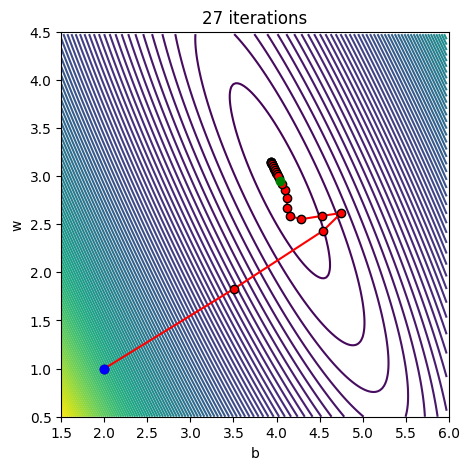

In [50]:
w4 = GD_NAG(grad2, w_init, .5, .9)
lr_gd_draw(w4)

Through the example of GD with normal momentum and NAG, we can see that with the normal momentum method, the path is quite zigzag and takes many iterations. In contrast, the solution using the NAG method converges faster and with fewer zigzags.

## Stochastic gradient descent

In SGD, at one time (loop–iteration), we calculate the derivative of the loss function based on just one data point $\mathbf{x}_i$ and then update $\theta$ based on this derivative. Note that the loss function is usually averaged over each data point, so the derivative at one point is also expected to be quite close to the derivative of the loss function over all data points. After going through all the data points, the algorithm repeats the above process. This simple variation actually works very well.

### Order of data point selection:

One point to note is: after each [epoch](https://www.baeldung.com/cs/epoch-vs-batch-vs-mini-batch), we need to shuffle the order of the data to ensure randomness. This also affects the performance of SGD.

Mathematically, the SGD update rule is:

$$\theta\leftarrow\theta - \eta\nabla_{\theta}J(\theta; \mathbf{x}_i; \mathbf{y}_i)$$

where $J(\theta; \mathbf{x_i; y_i})$ is the loss function with only 1 pair of data points (input, label) $(\mathbf{x}_i; \mathbf{y}_i)$. Note: we can completely apply GD acceleration algorithms such as Momentum, NAG,... to SGD.

### Example of linear regression problem:

With linear regression problem, $\theta = \mathbf{w}$, the cost function at a data point is:

$$J(\mathbf{w; x}_i; y_i) = \frac{1}{2}(\mathbf{x}_i\mathbf{w} - y_i)^2$$

The derivative with respect to $\mathbf{w}$ is:

$$\nabla_{\mathbf{w}}J(\mathbf{w; x}_i; y_i) = \mathbf{x}_i^T(\mathbf{x}_i\mathbf{w}- y_i)$$

In [9]:
# `sgrad` is the stochastic gradient at the point `i` of the dataset `rd_id`
def sgrad(w, i, rd_id, Xbar, y):
    true_i = rd_id[i]
    xi = Xbar[true_i, :]
    yi = y[true_i]
    a = np.dot(xi, w) - yi
    return (xi * a).reshape(2, 1)

def SGD(w_init, grad, eta, X, y, Xbar):
    w = [w_init]
    w_last_check = w_init # save the last value of w to check convergence
    iter_check_w = 10 # check after 10 iterations
    N = X.shape[0]
    count = 0
    for it in range(10):
        # shuffle data 
        rd_id = np.random.permutation(N)
        for i in range(N):
            count += 1
            g = sgrad(w[-1], i, rd_id, Xbar, y)
            w_new = w[-1] - eta * g
            w.append(w_new)
            if count % iter_check_w == 0:
                w_this_check = w_new                 
                if np.linalg.norm(w_this_check - w_last_check) / len(w_init) < 1e-3:
                    return w
                w_last_check = w_this_check
    return w

In [10]:
np.random.seed(2)

X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1)

# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_exact = np.dot(np.linalg.pinv(A), b)

In [11]:
w_init = np.array([[2], [1]])
w = SGD(w_init, grad2, .1, X, y, Xbar)

print(len(w), w[-1])

341 [[4.06708447]
 [2.94222754]]


MovieWriter imagemagick unavailable; using Pillow instead.


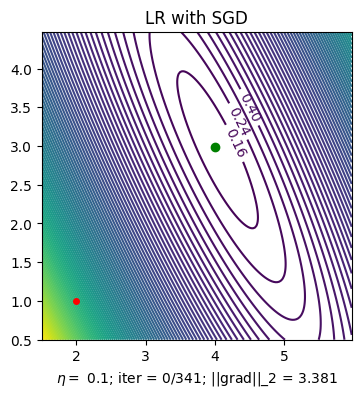

In [12]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

def save_gif3(eta, grad):
#     (w, it) = GD_momentum(w_init, grad, eta, gamma)
    batch_it = 20
#     w = SGD(w_init, grad, eta)
    it = len(w)
    fig, ax = plt.subplots(figsize=(4,4))    
    plt.cla()
    plt.axis([1.5, 7, 0.5, 4.5])
#     x0 = np.linspace(0, 1, 2, endpoint=True)
    
    def update(ii):
        if ii == 0:
            plt.cla()
            CS = plt.contour(Bg, Wg, J_w, 100)
            manual_locations = [(4.5, 3.5), (4.2, 3), (4.3, 3.3)]
            animlist = plt.clabel(CS, inline=.1, 
                                  fontsize=10, manual=manual_locations)
#             animlist = plt.title('labels at selected locations')
            plt.plot(w_exact[0], w_exact[1], 'go')
        else:
            animlist = plt.plot([w[(ii-1)*batch_it][0], w[ii*batch_it][0]], 
                                [w[(ii-1)*batch_it][1], w[ii*batch_it][1]], 'r-')
        animlist = plt.plot(w[ii*batch_it][0], w[ii*batch_it][1], 'ro', markersize = 4) 
        xlabel = '$\eta =$ ' + str(eta) + '; iter = %d/%d' %(ii*batch_it, it)
        xlabel += '; ||grad||_2 = %.3f' % np.linalg.norm(grad(w[ii*batch_it]))
        ax.set_xlabel(xlabel)
        animlist = plt.title('LR with SGD')
        return animlist, ax
       
    anim1 = FuncAnimation(fig, update, 
                          frames=np.arange(0, it//batch_it), interval=100)
#     fn = 'img2_' + str(eta) + '.gif'
    fn = 'LR_SGD_contours.gif'
    anim1.save(fn, dpi=100, writer='imagemagick')

eta = .1 

save_gif3(eta, grad2)
# save_gif2(.1)
# save_gif2(2)

In [13]:
# loss function 
print(cost2(w[-1]))
loss = np.zeros((len(w), 1))
for i in range(len(w)):
    loss[i] = cost2(w[i])
print(loss)

0.019786370388404136
[[4.59755191]
 [3.57975965]
 [2.72640426]
 [2.29689808]
 [2.02669385]
 [1.63526004]
 [1.29110273]
 [0.92058071]
 [0.74402473]
 [0.54929825]
 [0.4234797 ]
 [0.36322573]
 [0.27599144]
 [0.21730651]
 [0.20001786]
 [0.18534018]
 [0.11148358]
 [0.10401896]
 [0.07471241]
 [0.08685502]
 [0.07906473]
 [0.07675336]
 [0.07716629]
 [0.08127531]
 [0.05632924]
 [0.05427597]
 [0.04399108]
 [0.04167554]
 [0.04165811]
 [0.04176121]
 [0.04177434]
 [0.0408127 ]
 [0.04082048]
 [0.04109009]
 [0.04149968]
 [0.04173486]
 [0.04206246]
 [0.04121664]
 [0.04067389]
 [0.04028629]
 [0.04035807]
 [0.04070023]
 [0.04359575]
 [0.04437372]
 [0.04254057]
 [0.03893889]
 [0.03885582]
 [0.03944896]
 [0.04065301]
 [0.0401509 ]
 [0.03926301]
 [0.03930822]
 [0.03809544]
 [0.03983682]
 [0.0406175 ]
 [0.03942656]
 [0.03958151]
 [0.03976717]
 [0.04021302]
 [0.03692831]
 [0.03743812]
 [0.03695819]
 [0.03797065]
 [0.0447137 ]
 [0.04127297]
 [0.03902368]
 [0.03762169]
 [0.03928377]
 [0.03834196]
 [0.04058977]

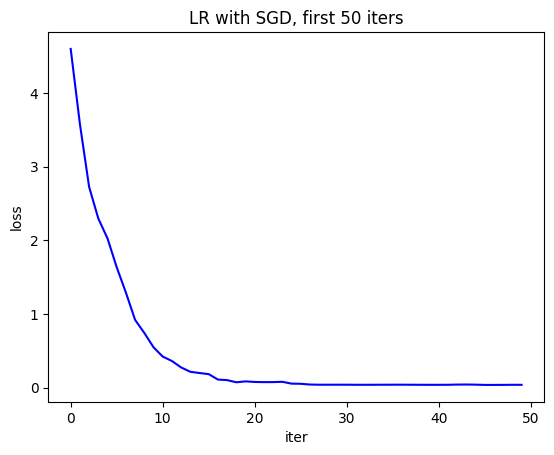

In [26]:
plt.plot(range(50), loss[:50], 'b')
plt.xlabel('iter')
plt.ylabel('loss')
plt.title('LR with SGD, first 50 iters')
plt.show()

## Mini-batch Gradient Descent

Unlike SGD, mini-batch uses a number of $k$ larger than one (but still much smaller than the total number of data points $N$) to update at each iteration. Similar to SGD, mini-batch GD starts each epoch by randomly shuffling the data and then dividing the entire data into mini-batches, each mini-batch has $k$ data points (except the last mini-batch has there could be less if $N$ is not divisible by $k$). In each loop, this algorithm takes a mini-batch to calculate the derivative and then updates. An epoch is also when the algorithm runs through all the data at once. Thus, an epoch consists of approximately $\frac{N}{k}$ iterations. The value $k$ is called the batch size (not mini-batch size) and is usually chosen to be between a few dozen and a few hundred.

The formula can be written as follows:

$$\theta\leftarrow\theta - \eta\nabla_{\theta}J(\theta; \mathbf{x}_{i:i+n}; \mathbf{y}_{i:i+n})$$

Where $\mathbf{x}_{i:i+n}$ and $\mathbf{y}_{i:i+n}$ can be understood as data from $i$ to $i + n - 1$ (according to Python). This data after each epoch is different because they need to be shuffled. Again, other algorithms for GD such as Momentum, NAG, Adagrad, Adadelta,... can also be applied here.

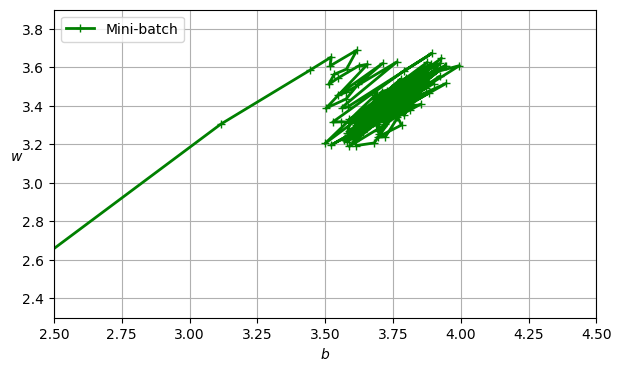

In [29]:
m = len(X_b)
n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(2)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.legend(loc="upper left")
plt.xlabel(r"$b$")
plt.ylabel(r"$w$", rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.grid()
plt.show()

___
## **References:**

$[1].$ *Vũ Hữu Tiệp. Machine Learning cơ bản, Chapter 12, 2018.*

$[2].$ *DeepLearning.AI - Andrew Ng. Machine Learning Specialization, Supervised Machine Learning: Regression and Classification.*

$[3].$ *Aurélien Géron. Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow, Chapter 4, pages 148-149.*

$[4].$ *[Gajanan Bhat. Gradient Descent with Momentum.](https://gbhat.com/machine_learning/gradient_descent_with_momentum.html)*

$[5].$ *Baeldung. Differences Between Epoch, Batch, and Mini-batch.*